In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from IPython.display import display, clear_output

from iarchitect import envs,trainer as trainer_iarch
from iarchitect.agents import dqn as dqn_iarch
from iarchitect.common import show_policy_behaviour
from tf_agents.agents import DdpgAgent,DqnAgent

from tf_agents.utils import common
from tf_agents import networks
from tf_agents.networks import sequential
from tf_agents.environments import py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.specs import array_spec
from tf_agents.environments import wrappers
from tf_agents.environments import suite_gym
from tf_agents.trajectories import time_step as ts
from tf_agents.metrics import py_metrics,tf_metrics
from tf_agents.drivers import py_driver,dynamic_episode_driver,dynamic_step_driver
from tf_agents.policies import random_py_policy,random_tf_policy,PyTFEagerPolicy
from tf_agents.replay_buffers import tf_uniform_replay_buffer,py_uniform_replay_buffer

from tensorflow import Tensor,Variable
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras import initializers


2022-03-02 15:10:04.940412: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-02 15:10:04.940462: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



# Utils

## Behavior

In [14]:
def show_agent_behavior(train_env,agent,ax,ax2):
    results = show_policy_behaviour(train_env,trainer.agent.policy,50)
    ax.plot([r[0] for r in results],label="action")
    ax.plot([r[1] for r in results],label="reward")
    ax2.imshow(np.vstack([r[2] for r in results]))

## Plot

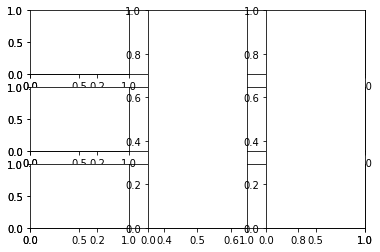

In [15]:
fig,axes = plt.subplots(3,1)
gs = GridSpec(3, 3)
ax = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[:,1])
ax5 = fig.add_subplot(gs[:,2])

def update_plot(step,trainer):
    ax.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()
    ax.plot(trainer.metrics,label="metric",color="green")
    ax2.plot(trainer.losses,label="loss",color="red")
    trainer.observer.plot_reward(ax=ax3,slice_=slice(-50,None,None))
    show_agent_behavior(trainer.tf_env,trainer.agent,ax4,ax5)
    ax.legend()
    ax2.legend()
    clear_output(wait = True)
    display(fig)

# Examples

## AlignedRows 4

In [9]:
environment = envs.AlignedRowEnv(4,action_float=False,
                            fail_on_same=True,
                           rewards = {
                     "already_filled":-10,
                     "max_iter":-10,
                     "new_value":1,
                     "success":10
                 })
utils.validate_py_environment(environment, episodes=5)
train_env = tf_py_environment.TFPyEnvironment(environment)

In [10]:
network = dqn_iarch.network_factory((20,20),environment.dimension)
agent = dqn_iarch.agent_factory(
    train_env,
    network=network,
    learning_rate=0.001)

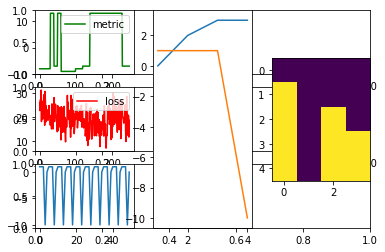

KeyboardInterrupt: 

In [18]:
trainer = trainer_iarch.Trainer(train_env,agent)
trainer.run(callbacks=[update_plot],
            num_steps_collect_driver=640,
            sample_batch_size_experience = 64,
            num_iterations_train = 10
           )

In [22]:
environment = envs.AlignedRowEnv(10,action_float=False,
                            fail_on_same=True,
                           rewards = {
                     "already_filled":-10,
                     "max_iter":-10,
                     "new_value":1,
                     "success":10
                 })
utils.validate_py_environment(environment, episodes=5)
train_env = tf_py_environment.TFPyEnvironment(environment)

In [25]:
network = dqn_iarch.network_factory((150,50),environment.dimension)
agent = dqn_iarch.agent_factory(
    train_env,
    network=network,
    learning_rate=0.001)

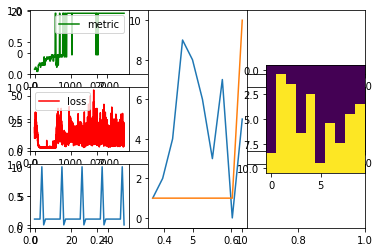

KeyboardInterrupt: 

In [26]:
trainer = trainer_iarch.Trainer(train_env,agent)
trainer.run(callbacks=[update_plot],
            num_steps_collect_driver=640,
            sample_batch_size_experience = 64,
            num_iterations_train = 10
           )

In [5]:
environment = envs.AlignedRowEnv(16,action_float=False,
                            fail_on_same=True,
                           rewards = {
                     "already_filled":-10,
                     "max_iter":-10,
                     "new_value":1,
                     "success":10
                 })
utils.validate_py_environment(environment, episodes=5)
train_env = tf_py_environment.TFPyEnvironment(environment)

In [6]:
network = dqn_iarch.network_factory((150,50),environment.dimension)
agent = dqn_iarch.agent_factory(
    train_env,
    network=network,
    learning_rate=0.001)

2022-03-02 15:10:28.269459: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-02 15:10:28.269523: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-02 15:10:28.269543: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ALS-358): /proc/driver/nvidia/version does not exist
2022-03-02 15:10:28.270037: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


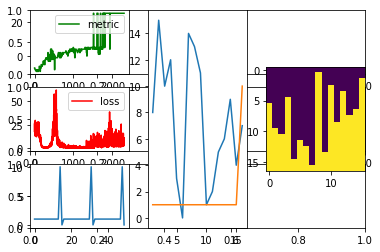

/home/maxime/.pyenv/versions/iarchitect/lib/python3.8/site-packages/tf_agents/utils/common.py:1432: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return state is not None and state is not () and state is not []
/home/maxime/.pyenv/versions/iarchitect/lib/python3.8/site-packages/tf_agents/utils/common.py:1432: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return state is not None and state is not () and state is not []
/home/maxime/.pyenv/versions/iarchitect/lib/python3.8/site-packages/tf_agents/policies/tf_policy.py:252: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if policy_state is ():  # pylint: disable=literal-comparison
/home/maxime/.pyenv/versions/iarchitect/lib/python3.8/site-packages/tf_agents/policies/tf_policy.py:314: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if not (policy_state is None or policy_state is () or policy_state is []):  # pylint: disable=literal-comparison
/home/maxime/.pyenv/versions/iarchitect/lib/python

KeyboardInterrupt: 

In [7]:
trainer = trainer_iarch.Trainer(train_env,agent)
trainer.run(callbacks=[update_plot],
            num_steps_collect_driver=640,
            sample_batch_size_experience = 64,
            num_iterations_train = 10
           )

In [11]:
train_env.current_time_step()

TimeStep(
{'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 16), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>})

/home/maxime/.pyenv/versions/iarchitect/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


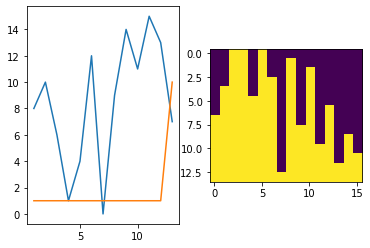

In [16]:
train_env.reset()
train_env.step(np.array(2))
train_env.step(np.array(5))
train_env.step(np.array(3))
fig,axes = plt.subplots(1,2)
show_agent_behavior(train_env,trainer.agent,*axes)